<a href="https://colab.research.google.com/github/J-o-y-y/Fintech_data_analysis/blob/main/CNN_%EC%8B%A4%EC%8A%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

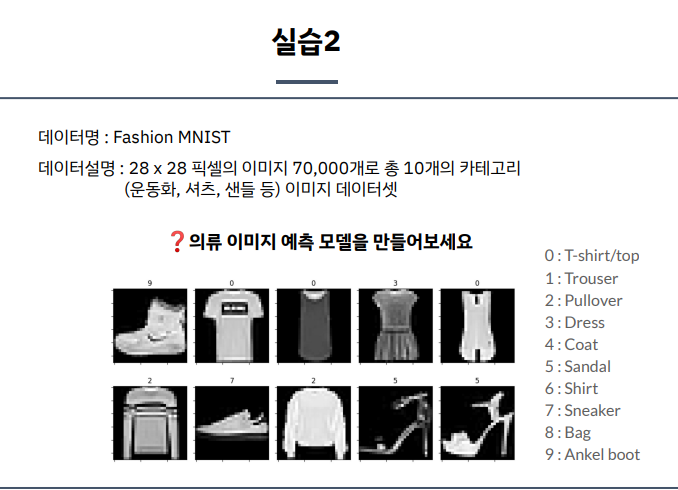

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),( x_test, y_test) = fmnist.load_data()

In [5]:
# 데이터 불러오기
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0  # 이미지 정규화

# 모델 만들기
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 입력 이미지를 평탄화
    keras.layers.Dense(128, activation='relu'),  # 은닉층
    keras.layers.Dropout(0.2),  # 드롭아웃
    keras.layers.Dense(10, activation='softmax')  # 출력층 (10개의 카테고리)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5302 - accuracy: 0.8137
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4003 - accuracy: 0.8547
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3644 - accuracy: 0.8664
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3451 - accuracy: 0.8742
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3294 - accuracy: 0.8789
313/313 - 1s - loss: 0.3467 - accuracy: 0.8735 - 628ms/epoch - 2ms/step

테스트 정확도: 0.8734999895095825


Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2765 - accuracy: 0.8964 - val_loss: 0.3461 - val_accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2733 - accuracy: 0.8983 - val_loss: 0.3328 - val_accuracy: 0.8842
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2646 - accuracy: 0.9014 - val_loss: 0.3359 - val_accuracy: 0.8849
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2614 - accuracy: 0.9013 - val_loss: 0.3318 - val_accuracy: 0.8870
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2550 - accuracy: 0.9050 - val_loss: 0.3358 - val_accuracy: 0.8834


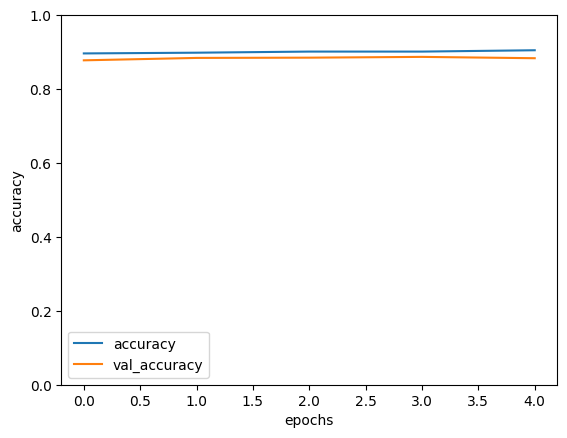

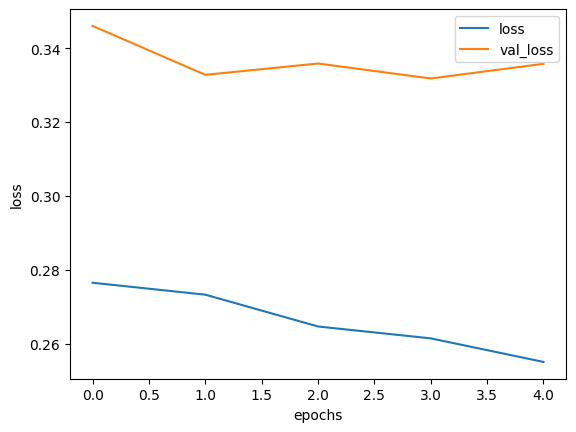

In [7]:
import matplotlib.pyplot as plt

# 모델 훈련
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# 훈련 및 테스트 정확도 그래프
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

# 훈련 및 테스트 손실 그래프
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# CNN

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0  # 이미지 정규화

# 모델 만들기
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 데이터 차원 조정
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 56s 29ms/step - loss: 0.4521 - accuracy: 0.8371
Epoch 2/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.3038 - accuracy: 0.8894
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2560 - accuracy: 0.9053
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2230 - accuracy: 0.9168
Epoch 5/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.1974 - accuracy: 0.9265
313/313 - 2s - loss: 0.2489 - accuracy: 0.9071 - 2s/epoch - 8ms/step

테스트 정확도: 0.9071000218391418


# DNN

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train, x_test = x_train / 255.0, x_test / 255.0  # 이미지 정규화

# 모델 만들기
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 입력 이미지를 평탄화
    keras.layers.Dense(128, activation='relu'),  # 은닉층
    keras.layers.Dense(64, activation='relu'),   # 추가 은닉층
    keras.layers.Dense(10, activation='softmax')  # 출력층 (10개의 카테고리)
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=5)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\n테스트 정확도:', test_acc)


Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4889 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3691 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3342 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2948 - accuracy: 0.8914
313/313 - 1s - loss: 0.3492 - accuracy: 0.8750 - 616ms/epoch - 2ms/step

테스트 정확도: 0.875
